# Custom Dataset

## Loade Dataset from sklearn

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [35]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['class'] = cancer.target
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [36]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'class'],
      dtype='object')

## Convert to Pytorch Tensor

In [37]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [38]:
data = torch.from_numpy(df.values).float()

In [39]:
data.shape

torch.Size([569, 31])

In [40]:
x = data[:,:10]
y = data[:,-1:]

print(x.shape,y.shape)

torch.Size([569, 10]) torch.Size([569, 1])


In [42]:
ratios = [0.6,0.2,0.2]

In [43]:
train_cnt = int(data.size(0) * ratios[0])
valid_cnt = int(data.size(0) * ratios[1])
test_cnt = data.size(0) - train_cnt - valid_cnt
cnts = [train_cnt, valid_cnt, test_cnt]

print("Train %d / Valid %d / Test %d samples." % (train_cnt, valid_cnt, test_cnt))

Train 341 / Valid 113 / Test 115 samples.


In [44]:
indices = torch.randperm(data.size(0))

In [46]:
x = torch.index_select(x, dim=0, index = indices)
y = torch.index_select(y, dim=0, index = indices)
x.shape

torch.Size([569, 10])

In [47]:
x = x.split(cnts, dim=0)
y = y.split(cnts, dim=0)

In [52]:
for x_i, y_i in zip(x, y):
    print(x_i.size(), y_i.size())

torch.Size([341, 10]) torch.Size([341, 1])
torch.Size([113, 10]) torch.Size([113, 1])
torch.Size([115, 10]) torch.Size([115, 1])


(tensor([[1.7950e+01, 2.0010e+01, 1.1420e+02,  ..., 5.5960e-02, 2.1290e-01,
          5.0250e-02],
         [8.1960e+00, 1.6840e+01, 5.1710e+01,  ..., 5.9170e-03, 1.7690e-01,
          6.5030e-02],
         [1.1630e+01, 2.9290e+01, 7.4870e+01,  ..., 2.0170e-02, 1.7990e-01,
          6.1660e-02],
         ...,
         [1.2320e+01, 1.2390e+01, 7.8850e+01,  ..., 3.7000e-02, 1.9590e-01,
          5.9550e-02],
         [1.2270e+01, 2.9970e+01, 7.7420e+01,  ..., 0.0000e+00, 1.7010e-01,
          5.9600e-02],
         [1.1410e+01, 1.0820e+01, 7.3340e+01,  ..., 2.6230e-02, 1.6670e-01,
          6.1130e-02]]),
 tensor([[1.1840e+01, 1.8700e+01, 7.7930e+01,  ..., 5.1820e-02, 2.3010e-01,
          7.7990e-02],
         [1.2190e+01, 1.3290e+01, 7.9080e+01,  ..., 2.8820e-02, 1.8800e-01,
          6.4710e-02],
         [6.9810e+00, 1.3430e+01, 4.3790e+01,  ..., 0.0000e+00, 1.9300e-01,
          7.8180e-02],
         ...,
         [1.4030e+01, 2.1250e+01, 8.9790e+01,  ..., 1.8960e-02, 1.5170e-01,
   

# Set Hyper Parameters

In [56]:
n_epochs = 10000
batch_size = 128
print_interval = 500
early_stop = 100

# Get DataLoaders

In [57]:
from torch.utils.data import Dataset, DataLoader

In [58]:
class CustomDataset(Dataset):
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        
        super().__init__()
    
    # 길이를 받을 수 있음
    def __len__(self):
        return len(self.data)
    
    # slicing 가능하게 함
    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

In [66]:
train_loader = DataLoader(
    dataset = CustomDataset(x[0],y[0]),
    batch_size=batch_size,
    shuffle=True,
)

valid_loader = DataLoader(
    dataset = CustomDataset(x[1],y[1]),
    batch_size=batch_size,
    shuffle=False,
)

test_loader = DataLoader(
    dataset = CustomDataset(x[2],y[2]),
    batch_size = batch_size,
    shuffle=False,
)

print("Train {} / Valid {} / Test {} samples.".format(len(train_loader.dataset), len(valid_loader.dataset), len(test_loader.dataset)))

Train 341 / Valid 113 / Test 115 samples.


# Build Model and Optimizer

In [68]:
model = nn.Sequential(
    nn.Linear(x[0].size(-1),6),
    nn.LeakyReLU(),
    nn.Linear(6,5),
    nn.LeakyReLU(),
    nn.Linear(5,4),
    nn.LeakyReLU(),
    nn.Linear(4,3),
    nn.LeakyReLU(),
    nn.Linear(3,y[0].size(-1)),
    nn.Sigmoid()
)
model

Sequential(
  (0): Linear(in_features=10, out_features=6, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=6, out_features=5, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=5, out_features=4, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=4, out_features=3, bias=True)
  (7): LeakyReLU(negative_slope=0.01)
  (8): Linear(in_features=3, out_features=1, bias=True)
  (9): Sigmoid()
)

In [69]:
optimizer = optim.Adam(model.parameters())

# Train

In [70]:
from copy import deepcopy

lowest_loss = np.inf
best_model = None

lowest_epoch = np.inf

In [71]:
train_history, valid_history = [], []

In [76]:
for i in range(n_epochs):
    model.train()
    
    train_loss, valid_loss = 0, 0
    y_hat = []
    
    for x_i, y_i in train_loader:
        y_hat_i = model(x_i)
        loss = F.binary_cross_entropy(y_hat_i, y_i)
        
        optimizer.zero_grad()
        loss.backward()
        
        optimizer.step()
        train_loss = train_loss + float(loss)
        
    train_loss = train_loss / len(train_loader)
    
    model.eval()
    
    with torch.no_grad():
        valid_loss = 0
        
        for x_i, y_i in valid_loader:
            y_hat_i = model(x_i)
            loss = F.binary_cross_entropy(y_hat_i, y_i)
            
            valid_loss = valid_loss + float(loss)
            
            y_hat = y_hat + [y_hat_i]
            
    train_history += [train_loss]
    valid_history += [valid_loss]
    
    if (i + 1) % print_interval == 0:
        print("Epoch {}: train loss={:.4e}, valid_loss = {:.4e} lowest_loss = {:.4e}".format(i+1,train_loss,valid_loss,lowest_loss))
        
    if valid_loss <= lowest_loss:
        lowest_loss = valid_loss
        lowest_epoch = i
        
        best_model = deepcopy(model.state_dict())
        
    else:
        if early_stop > 0 and lowest_epoch + early_stop < i +1:
            print("There is no improvement during last %d epochs." % early_stop)
            break
print("The best validation loss from epoch %d: %.4e" % (lowest_epoch + 1, lowest_loss))
model.load_state_dict(best_model)

There is no improvement during last 100 epochs.
The best validation loss from epoch 274: 1.2211e-01


<All keys matched successfully>

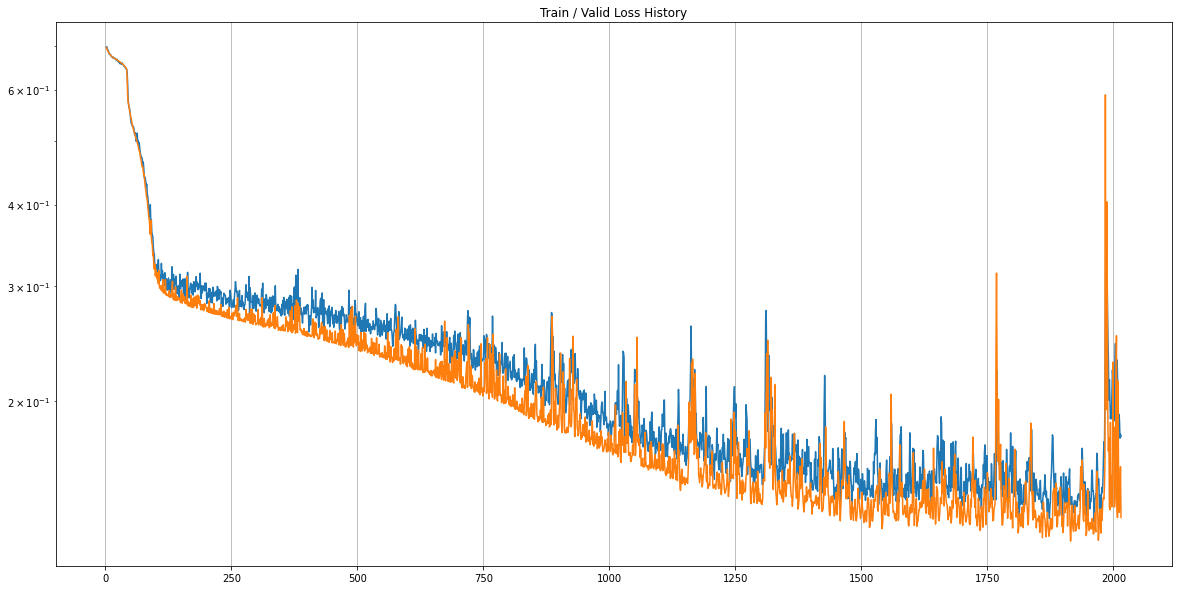

In [77]:
plot_from = 2

plt.figure(figsize=(20, 10))
plt.grid(True)
plt.title("Train / Valid Loss History")
plt.plot(
    range(plot_from, len(train_history)), train_history[plot_from:],
    range(plot_from, len(valid_history)), valid_history[plot_from:],
)
plt.yscale('log')
plt.show()

In [78]:
test_loss = 0
y_hat = []

model.eval()
with torch.no_grad():
    for x_i, y_i in test_loader:
        y_hat_i = model(x_i)
        loss = F.binary_cross_entropy(y_hat_i, y_i)

        test_loss += loss # Gradient is already detached.

        y_hat += [y_hat_i]

test_loss = test_loss / len(test_loader)
y_hat = torch.cat(y_hat, dim=0)

print("Test loss: %.4e" % test_loss)

Test loss: 1.3098e-01


In [79]:
correct_cnt = (y[2] == (y_hat > .5)).sum()
total_cnt = float(y[2].size(0))

print('Test Accuracy: %.4f' % (correct_cnt / total_cnt))

Test Accuracy: 0.9478
